In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing tensorflow
import tensorflow as tf

In [ ]:
#checking techsorflow version
print(tf.__version__)

2.11.0


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the dataset

data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
#checking first five rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#checking null values if any
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#observation: No null values found here

In [ ]:
#checking duplicate values
data.duplicated().sum()

0

In [ ]:
#observation: No duplicate values found here

In [ ]:
#checking columns
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#dropping unnecessary columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
from pandas.io.pytables import DataCol
#splitting the data
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
geography = pd.get_dummies(x['Geography'],drop_first=True)

In [ ]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
x = x.drop(['Geography','Gender'],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
#concatinating the geography and gender

x = pd.concat([x,geography,gender],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#splitting the dataset into x_train, y_train
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.2, random_state=0)


In [ ]:
x_train.shape

(8000, 11)

In [ ]:
#performing feature scaling

from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)

In [ ]:
x_test = sc.transform(x_test) 

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
#part2 = now let's create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
# let's initialize the ANN

classifier = Sequential()

In [ ]:
#adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
#classifier.add(Dropout(0.2)), we can also check with this

In [ ]:
#adding the 2nd hidden layer
classifier.add(Dense(units=5,activation='relu'))
#classifier.add(Dropout(0.2)), we can also check with this

In [ ]:
#adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))


In [ ]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Observations: in adam optimizer we will get the learning rate automatically as 0.01 

In [ ]:
#creating our own learning rate
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate-0.01)

NameError: ignored

In [ ]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.5150 - accuracy: 0.7953 - val_loss: 0.4587 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4439 - accuracy: 0.7962 - val_loss: 0.4374 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4228 - accuracy: 0.7962 - val_loss: 0.4198 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4039 - accuracy: 0.8147 - val_loss: 0.4045 - val_accuracy: 0.8251
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3881 - accuracy: 0.8421 - val_loss: 0.3994 - val_accuracy: 0.8319
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3771 - accuracy: 0.8475 - val_loss: 0.3873 - val_accuracy: 0.8372
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3693 - accuracy: 0.8511 - val_loss: 0.3933 - val_accuracy: 0.8429

In [ ]:
#early_stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks = early_stopping)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3216 - accuracy: 0.8660 - val_loss: 0.3692 - val_accuracy: 0.8557
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3211 - accuracy: 0.8653 - val_loss: 0.3687 - val_accuracy: 0.8542
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3212 - accuracy: 0.8671 - val_loss: 0.3670 - val_accuracy: 0.8538
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3212 - accuracy: 0.8668 - val_loss: 0.3708 - val_accuracy: 0.8482
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3212 - accuracy: 0.8683 - val_loss: 0.3668 - val_accuracy: 0.8554
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3205 - accuracy: 0.8679 - val_loss: 0.3643 - val_accuracy: 0.8550
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3223 - accuracy: 0.8684 - val_loss: 0.3664 - val_accuracy: 0.8516

In [ ]:
#observation: when we apply early stopping, the models has stopped in 26th epochs where we got the high accuracy continuously

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

AttributeError: ignored

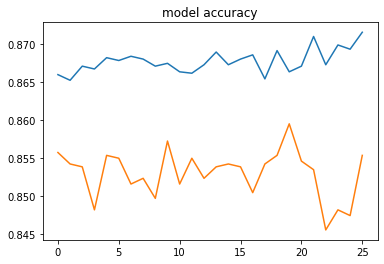

In [ ]:
#summerize history of accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylable('accuracy')
plt.xlable('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


AttributeError: ignored

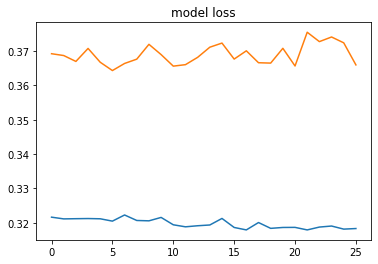

In [ ]:
#summerize history of loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylable('loss')
plt.xlable('epoch')k
plt.legend(['train','test'],loc='upper left')
plt.show()


In [ ]:
#making the predictions validating the model
#predicting the test set results

y_pred = classifier.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [ ]:
y_pred = (y_pred >= 0.5)

In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix


In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[1499,   96],
       [ 191,  214]])

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
score = accuracy_score(y_test, y_pred)

In [ ]:
score

0.8565

In [ ]:
# getting the weights

classifier.get_weights()

[array([[-1.36498287e-02, -1.62020773e-01,  2.55098492e-01,
         -1.30808160e-01, -3.68109286e-01,  7.00011998e-02,
         -1.29663199e-02, -2.46634260e-01, -1.14381723e-02,
         -2.51235008e-01,  1.06928527e-01],
        [-1.31482631e-01, -9.30389225e-01, -3.71125877e-01,
          2.81302065e-01, -3.25130254e-01,  5.12021184e-01,
         -1.04748219e-01, -3.48979890e-01, -6.91963673e-01,
         -3.13644201e-01, -7.28124976e-01],
        [-3.68966550e-01, -2.10091010e-01, -3.68787467e-01,
         -2.67842114e-01,  4.41590786e-01,  1.30510315e-01,
         -4.23216820e-01, -2.24993572e-01, -2.74343848e-01,
          2.37493828e-01, -3.65238898e-02],
        [-1.37029216e-01,  4.78851162e-02, -2.13800475e-01,
          4.86749679e-01, -7.94476688e-01,  1.45255983e-01,
         -8.99049699e-01,  6.13470733e-01, -1.10486336e-01,
          5.88648207e-03, -1.48740977e-01],
        [ 6.44191742e-01,  5.38903382e-03,  9.58395123e-01,
          1.02243948e+00, -2.35742033e-01, -